### Bài 1. Cho ma trận ảnh xám 3x3 với các giá trị cường độ pixel nhu sfu

a.Điều chỉnh cường độ sáng và độ tương phản của ảnh với giá trị và . Kết quả đầu ra gọi là 

b.Tìm ảnh mới  với giá trị hiệu chỉnh Gamma với 

In [39]:
import cv2
import numpy as np

f = np.array([
  [100, 120, 130],
  [140, 150, 160],
  [170, 180, 190]
])
#a. 
a=1.2
b=50
g1 = a*f + b
#b
gamma = 2
g2 = f**(1/gamma)
print(f"g1=\n{g1}")
print(f"g2=\n{g2}")

g1=
[[170. 194. 206.]
 [218. 230. 242.]
 [254. 266. 278.]]
g2=
[[10.         10.95445115 11.40175425]
 [11.83215957 12.24744871 12.64911064]
 [13.03840481 13.41640786 13.78404875]]


### Bài 2. Cho ảnh kích thước 2x2 với 3 thành phần màu R, G, B như sau
Thực hiện cân bằng trắng cho 3 thành phần màu với phương pháp được cho ở phần lý thuyết.

In [40]:
R = np.array([
  [100, 150],
  [200, 250]
])

G = np.array([
  [120, 170],
  [220, 270]
])

B = np.array([
  [130, 180],
  [230, 280]
])
#white balance
#k = 1
meanR = np.mean(R)
meanG = np.mean(G)
meanB = np.mean(B)
varR = np.var(R)
varG = np.var(G)
varB = np.var(B)
gR = np.zeros((2,2))
gG = np.zeros((2,2))
gB = np.zeros((2,2))

for i in range(len(R)):
    for j in range(len(R[i])):
        gR[i,j] = (R[i,j] - meanR) / np.sqrt(varR)
for i in range(len(G)):
    for j in range(len(G[i])):
        gG[i,j] = (R[i,j] - meanG) / np.sqrt(varG)
for i in range(len(B)):
    for j in range(len(B[i])):
        gB[i,j] = (B[i,j] - meanB) / np.sqrt(varB)
print(f"gR=\n{gR}")
print(f"gG=\n{gG}")
print(f"gB=\n{gB}")

gR=
[[-1.34164079 -0.4472136 ]
 [ 0.4472136   1.34164079]]
gG=
[[-1.69941166 -0.80498447]
 [ 0.08944272  0.98386991]]
gB=
[[-1.34164079 -0.4472136 ]
 [ 0.4472136   1.34164079]]


### Bài 3. Thực hiện cân bằng Histogram cho ảnh  sau sử dụng công thức tuyến tính trên bài đọc.

In [41]:
I = np.array([
  [52, 55, 61],
  [59, 79, 80],
  [85, 90, 100]
])
G = np.zeros((3,3))
L = 256
Imin = np.min(I)
Imax = np.max(I)
for i in range(len(I)):
    for j in range(len(I[i])):
      G[i,j] = (I[i,j]-Imin)*(L-1)/(Imax-Imin)
print(f"G=\n{G}")

G=
[[  0.      15.9375  47.8125]
 [ 37.1875 143.4375 148.75  ]
 [175.3125 201.875  255.    ]]


### Bài 4. Lọc làm sắc nét ảnh (Sharpening Filter)
Cho một hình ảnh 5x5 và một kernel 3x3 để làm sắc nét ảnh. Hãy tính toán giá trị điểm ảnh tại vị trí (2,2) và (3,3), (5, 5) sau khi áp dụng kernel. Giả sử biên được mở rộng bằng giá trị 0

In [42]:
f = np.array([
  [10, 20, 30, 40, 50],
  [60, 70, 80, 90, 100],
  [110, 120, 130, 140, 150],
  [160, 170, 180, 190, 200],
  [210, 220, 230, 240, 250]
])
h = np.array([
  [0, -1, 0],
  [-1, 5, -1],
  [0, -1, 0]
])
g = np.zeros((3,3))
for i in range(1, f.shape[0] - 1):
  for j in range(1, f.shape[1] - 1):
    g[i-1, j-1] = np.sum(f[i-1:i+2, j-1:j+2] * h)

print(g)

[[ 70.  80.  90.]
 [120. 130. 140.]
 [170. 180. 190.]]


### Bài 5. Viết chương trình Python thực hiện các thuật toán và phép biến đổi
#### a.Chuyển đổi pixel
def PixelTransform(f, a, b) truyền vào 1 ảnh f, hai tham số độ lệch b và độ lợi a. Kết quả trả về 1 ảnh mới đã được chuyển đổi pixel
#### b.Hiệu chỉnh gamma
def GammaCorrelation(f, gamma) truyền vào ảnh f và hệ số gamma, kết quả trả về 1 ảnh đã được hiệu chỉnh gamma
#### c.Cân bằng trắng	
def Whitening(f)  truyền vào ảnh f và trả về ảnh đã được cân bằng trắng

In [43]:
import numpy as np
def PixelTransform(f, a, b):
  return f * a + b

def GammaCorrelation(f, gamma):
  return f ** (1/gamma)

def Whitening(f):
  mean_f = np.mean(f)
  var_f = np.var(f)
  g_f = np.zeros(f.shape)
  for i in range(len(f)):
      for j in range(len(f[i])):
          g_f[i,j] = (f[i,j] - mean_f) / np.sqrt(var_f)
  return g_f

#test
T = np.array([
  [100, 120, 130],
  [140, 150, 160],
  [170, 180, 190]
])
print(PixelTransform(T, 1.2, 50)) 
print(GammaCorrelation(T, 2))
print(R)
print(Whitening(R))

[[170. 194. 206.]
 [218. 230. 242.]
 [254. 266. 278.]]
[[10.         10.95445115 11.40175425]
 [11.83215957 12.24744871 12.64911064]
 [13.03840481 13.41640786 13.78404875]]
[[100 150]
 [200 250]]
[[-1.34164079 -0.4472136 ]
 [ 0.4472136   1.34164079]]


### Bài 6. Viết chương trình đọc một ảnh và áp dụng bộ lọc tuyến tính tùy chọn và hiển thị ảnh sau lọc sử dụng thư viện OpenCV

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..15.968719422671311].


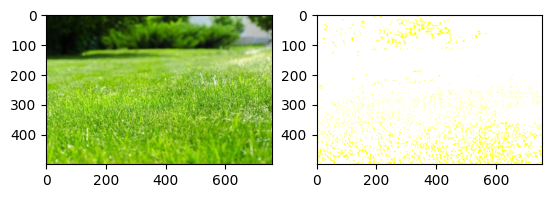

In [44]:
import cv2
from matplotlib import pyplot as plt
# Load an image
image = cv2.imread('grass.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
gamma = 2
g = GammaCorrelation(image_rgb, gamma)
plt.subplot(1, 2, 2)
plt.imshow(g)
plt.show()